In [1]:
%pip install torch torchvision timm scikit-learn matplotlib seaborn h5py pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import timm
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image

# Device configuration
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Constants
IMG_SIZE = 300  # EfficientNetB3 input size
BATCH_SIZE = 32
NUM_EPOCHS = 30
LEARNING_RATE = 0.0001
MODEL_PATH = r'C:\Users\rohit\Downloads\Mini Project\eye_disease_model.pth'

# Define classes
classes = ['cataract', 'DR', 'glaucoma', 'normal']
NUM_CLASSES = len(classes)


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # adjust for RGB images
])

# Load dataset
dataset = datasets.ImageFolder(root=r'C:\Users\rohit\Downloads\dataset', transform=transform)  # 🔁 Replace with actual dataset path

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)


In [4]:
model = EfficientNet.from_pretrained('efficientnet-b3', num_classes=NUM_CLASSES)
model.to(DEVICE)


Loaded pretrained weights for efficientnet-b3


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False
  

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print("Using Adam optimizer.")


Using Adam optimizer.


In [ ]:
train_losses = []
train_accuracies = []
label= []
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

torch.save({
    'model_state_dict': model.state_dict(),
    'classes': classes,
    'input_size': IMG_SIZE
}, MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")


Epoch [1/30], Loss: 0.6020, Accuracy: 80.11%
Epoch [2/30], Loss: 0.2272, Accuracy: 92.68%
Epoch [3/30], Loss: 0.1322, Accuracy: 95.43%
Epoch [4/30], Loss: 0.0804, Accuracy: 97.39%
Epoch [5/30], Loss: 0.0499, Accuracy: 98.31%
Epoch [6/30], Loss: 0.0521, Accuracy: 98.43%
Epoch [7/30], Loss: 0.0296, Accuracy: 99.14%
Epoch [8/30], Loss: 0.0371, Accuracy: 98.84%
Epoch [9/30], Loss: 0.0248, Accuracy: 99.41%
Epoch [10/30], Loss: 0.0172, Accuracy: 99.53%
Epoch [11/30], Loss: 0.0110, Accuracy: 99.73%
Epoch [12/30], Loss: 0.0088, Accuracy: 99.73%
Epoch [13/30], Loss: 0.0129, Accuracy: 99.47%
Epoch [14/30], Loss: 0.0140, Accuracy: 99.50%
Epoch [15/30], Loss: 0.0206, Accuracy: 99.32%
Epoch [16/30], Loss: 0.0291, Accuracy: 99.05%
Epoch [17/30], Loss: 0.0123, Accuracy: 99.61%
Epoch [18/30], Loss: 0.0160, Accuracy: 99.44%
Epoch [19/30], Loss: 0.0072, Accuracy: 99.79%
Epoch [20/30], Loss: 0.0089, Accuracy: 99.70%
Epoch [21/30], Loss: 0.0039, Accuracy: 99.85%
Epoch [22/30], Loss: 0.0101, Accuracy: 99.7

In [5]:
from efficientnet_pytorch import EfficientNet
import torch
import torch.nn as nn
classes = ['cataract', 'DR', 'glaucoma', 'normal']
NUM_CLASSES = len(classes)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientNet.from_name('efficientnet-b3')
model._fc = nn.Linear(model._fc.in_features, NUM_CLASSES)
MODEL_PATH = r'C:\Users\rohit\Downloads\Mini Project\eye_disease_model.pth'
checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(DEVICE)
model.eval()

print("Model loaded successfully for evaluation.")


Model loaded successfully for evaluation.


Classification Report:
              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00       104
          DR       0.99      0.99      0.99        97
    glaucoma       0.98      0.97      0.98       113
      normal       0.98      0.99      0.99       109

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



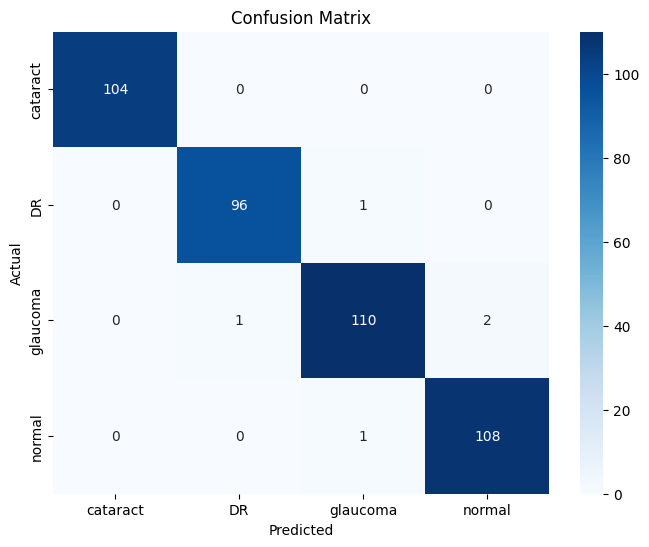

In [6]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

all_preds = []
all_labels = []
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Loss')
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Accuracy')
# plt.title('Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy (%)')
# plt.legend()

# plt.tight_layout()
# plt.show()



NameError: name 'train_losses' is not defined

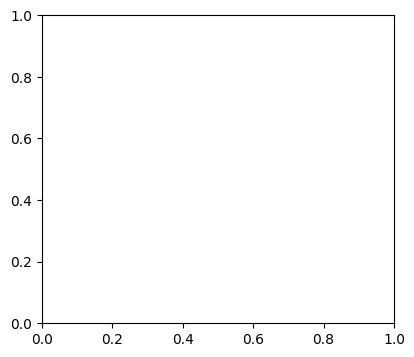

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
inference_model = EfficientNet.from_name('efficientnet-b3')
inference_model._fc = nn.Linear(inference_model._fc.in_features, NUM_CLASSES)

checkpoint = torch.load(MODEL_PATH, map_location=DEVICE)
inference_model.load_state_dict(checkpoint['model_state_dict'])
inference_model.to(DEVICE)
inference_model.eval()

print("Inference model loaded successfully.")


Inference model loaded successfully.


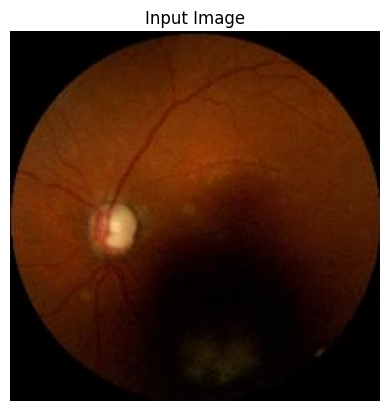

Predicted Class: glaucoma


In [10]:
def predict_image(image_path, model, transform, classes):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    image_tensor = transform(image).unsqueeze(0).to(DEVICE)  # Add batch dimension

    # Predict
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        predicted_class = classes[predicted.item()]

    print(f"Predicted Class: {predicted_class}")

# 🔁 Example usage:
image_path = r"C:\Users\rohit\Downloads\Mini Project\split_dataset\test\glaucoma\_2_8820241.jpg"  # Replace with actual image path
predict_image(image_path, inference_model, transform, classes)
